<a href="https://colab.research.google.com/github/ahmdhqnn/KAT-Praktikum/blob/main/Week5/Assignment_Modul_Minggu5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOAL 1: Lakukan clustering terhadap negara-negara berdasarkan variabel “income”, “child_mort”, “life_expec”, dan “gdpp” menggunakan metode K-Means dengan 3 klaster. Visualisasikan hasil clustering ini dalam bentuk scatterplot, dimana “gdpp” di-plot pada sumbu X dan “child_mort” pada sumbu Y dan hitung hasil clustering tersebut menggunakan Silhouette Score. Berikan interpretasi singkat tentang klaster yang terbentuk.

In [ ]:
import pandas as pd

df = pd.read_csv('Country-data.csv')

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ["income", "child_mort", "life_expec", "gdpp"]
X = df[features]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fix KMeans settings
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Show cluster counts
print(df['cluster'].value_counts().sort_index())



cluster
0    89
1    32
2    46
Name: count, dtype: int64


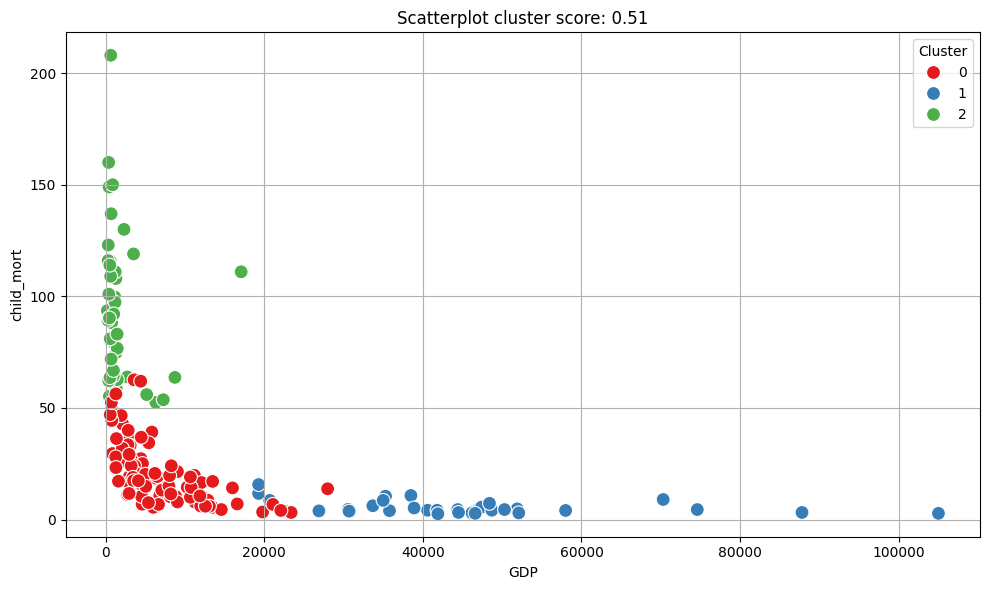

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
sil_score = silhouette_score(X_scaled, df['cluster'])

# Buat scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdpp', y='child_mort', hue='cluster', palette='Set1', s=100)
plt.title(f'Scatterplot cluster score: {sil_score:.2f}')
plt.xlabel('GDP')
plt.ylabel('child_mort')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

Hasilnya : Cluster 0 | 89 Negara => Negara kurang berkembang karena income dan gdpp rendah, child_mort tinggi,life_expec rendah

Cluster 1 | 32 Negara => Negara maju karena income dan gdpp tinggi, child_mort rendah, life_expec tinggi

Cluster 2 | 46 Negara => Negara berkembang karena income dan gdpp menengah,child_mort sedang, life_expec cukup tinggi

SOAL 2: Lakukan clustering menggunakan DBSCAN untuk memisahkan negara-negara berdasarkan variabel “child_mort” dan “health”. Gunakan nilai epsilon dan minimum samples yang sesuai, lalu visualisasikan hasil clustering ini. Berikan perhitungan hasil clustering menggunakan Davies-Bouldin Score.

In [ ]:
from sklearn.cluster import DBSCAN

X_dbscan = df[["child_mort", "health"]].copy()

X_dbscan_scaled = scaler.fit_transform(X_dbscan)

dbscan = DBSCAN(eps=0.5, min_samples=5)
df["dbscan_cluster"] = dbscan.fit_predict(X_dbscan_scaled)

result = df[['country', 'child_mort', 'health', 'dbscan_cluster']]
print(result)

                 country  child_mort  health  dbscan_cluster
0            Afghanistan        90.2    7.58               0
1                Albania        16.6    6.55               0
2                Algeria        27.3    4.17               0
3                 Angola       119.0    2.85               0
4    Antigua and Barbuda        10.3    6.03               0
..                   ...         ...     ...             ...
162              Vanuatu        29.2    5.25               0
163            Venezuela        17.1    4.91               0
164              Vietnam        23.3    6.84               0
165                Yemen        56.3    5.18               0
166               Zambia        83.1    5.89               0

[167 rows x 4 columns]


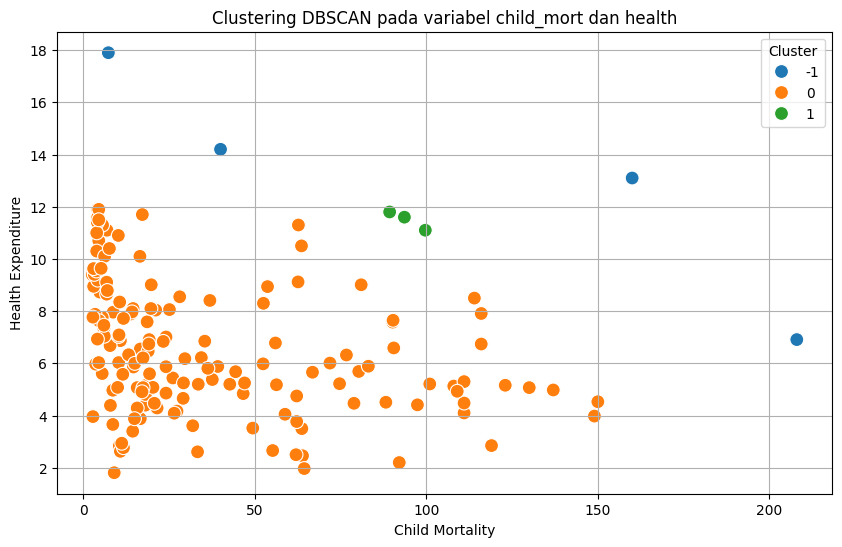

np.float64(3.144457016722247)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil kolom yang dibutuhkan
X = df[['child_mort', 'health']].copy()

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Coba nilai epsilon dan min_samples
dbscan = DBSCAN(eps=0.7, min_samples=4)
clusters = dbscan.fit_predict(X_scaled)

# Tambahkan hasil clustering ke dataframe
df['cluster'] = clusters

# Hitung Davies-Bouldin Score
db_score = davies_bouldin_score(X_scaled, clusters)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='child_mort', y='health', hue='cluster', palette='tab10', s=100)
plt.title('Clustering DBSCAN pada variabel child_mort dan health')
plt.xlabel('Child Mortality')
plt.ylabel('Health Expenditure')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

db_score


In [ ]:
db_score = davies_bouldin_score(X_scaled, clusters)

db_score

np.float64(3.144457016722247)

SOAL 3: Terapkan hierarchical clustering pada data tersebut menggunakan metode agglomerative clustering dengan linkage ward dan plot dendrogramnya. Tuliskan atau cetak berapa jumlah klaster yang optimal berdasarkan dendrogram.

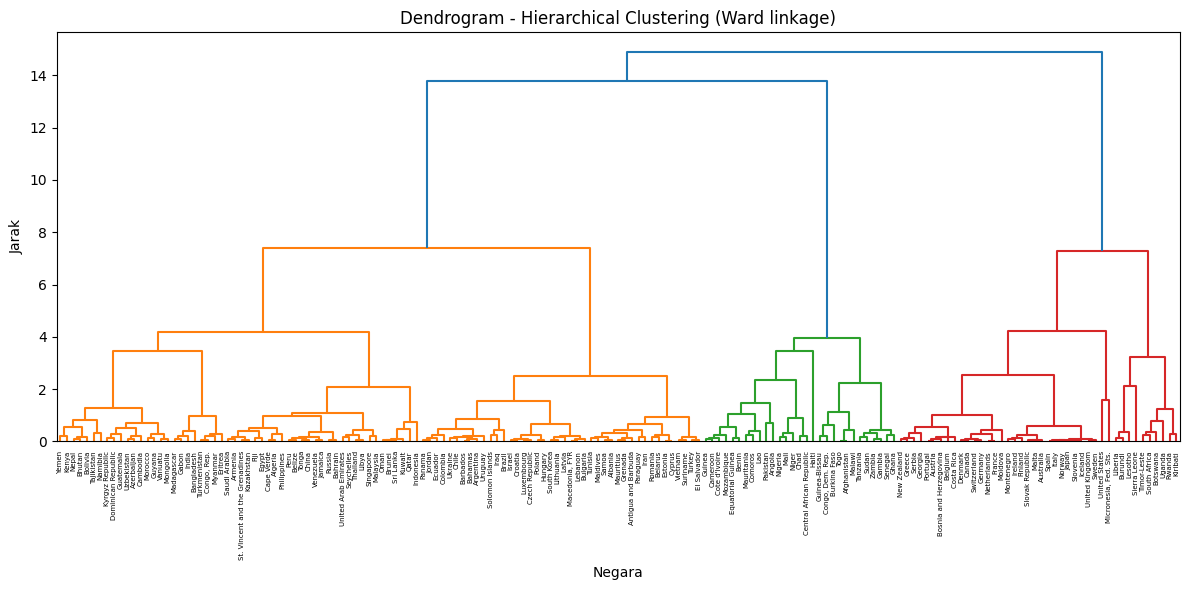

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Ambil kolom child_mort dan health
X = df[['child_mort', 'health']]

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buat linkage matrix dengan metode ward
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=df['country'].values,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram - Hierarchical Clustering (Ward linkage)')
plt.xlabel('Negara')
plt.ylabel('Jarak')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['cluster'] = cluster.fit_predict(X_scaled)

# Cetak jumlah klaster dan contoh hasil
print(f"Jumlah klaster optimal (berdasarkan dendrogram): {n_clusters}")
print(df[['country', 'child_mort', 'health', 'cluster']].head())

Jumlah klaster optimal (berdasarkan dendrogram): 3
               country  child_mort  health  cluster
0          Afghanistan        90.2    7.58        2
1              Albania        16.6    6.55        0
2              Algeria        27.3    4.17        0
3               Angola       119.0    2.85        2
4  Antigua and Barbuda        10.3    6.03        0
